In [457]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import layers
import pathlib

In [458]:
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))

Num CPUs Available:  1


In [459]:
print(tf.__version__)


2.4.1


In [460]:
data_dir = pathlib.Path("/home/divyanshu/Documents/Datasets/catvsdog/training_set")

In [461]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

8005


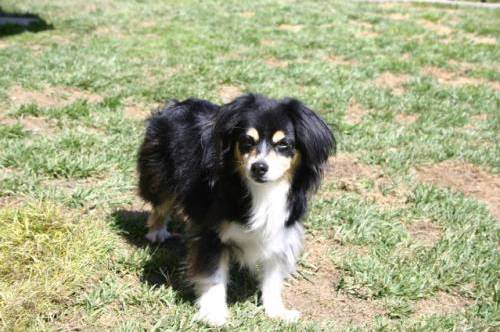

In [462]:
dogs = list(data_dir.glob('dogs/*'))
PIL.Image.open(str(dogs[0]))


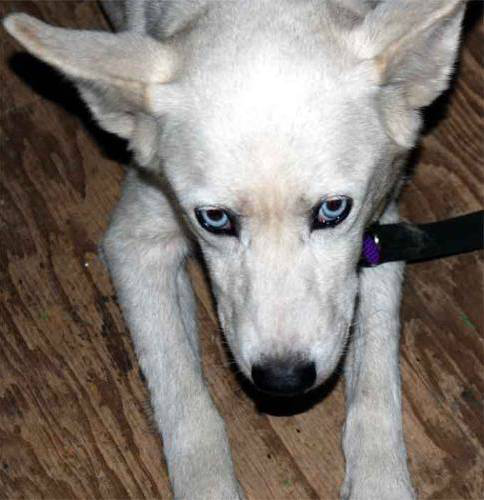

In [463]:
PIL.Image.open(str(dogs[1]))

In [464]:
batch_size = 32
img_height = 64
img_width = 64

In [465]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.


In [466]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8005 files belonging to 2 classes.
Using 1601 files for validation.


In [467]:
class_names = train_ds.class_names
print(class_names)


['cats', 'dogs']


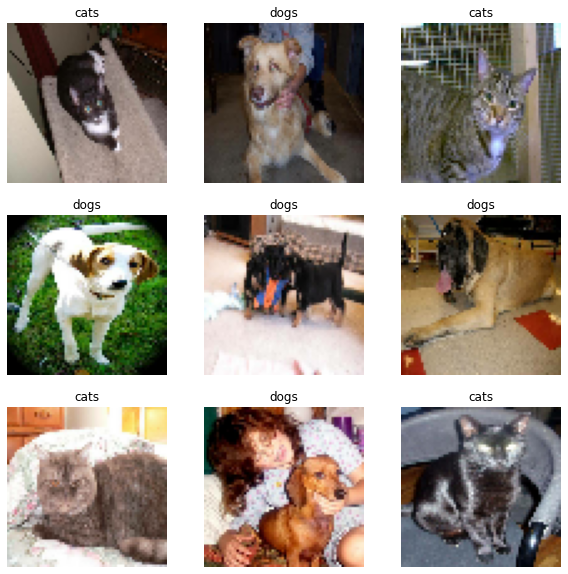

In [468]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [469]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 64, 64, 3)
(32,)


In [470]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [471]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [472]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="valid"),
  #layers.Dropout(0.1),
  layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding="valid"),
  layers.Dropout(0.7),
  layers.Flatten(),
  layers.Dense(120, activation='relu'),
  layers.Dense(84, activation='relu'),
  layers.Dense(num_classes)
])


In [473]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [474]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_50 (Rescaling)     (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 60, 60, 6)         456       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 26, 26, 16)        2416      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 2704)            

In [475]:
history= model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)


Epoch 1/20
201/201 [==============================] - 15s 70ms/step - loss: 0.6925 - accuracy: 0.5304 - val_loss: 0.6589 - val_accuracy: 0.5990
Epoch 2/20
 84/201 [===========>..................] - ETA: 4s - loss: 0.6586 - accuracy: 0.6059

KeyboardInterrupt: 